In [2]:
import pandas as pd
import calendar
from pandas import Series

df = pd.read_csv('data.csv')

Eliminando atributos

In [3]:
del df['description']
del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']

Discriminando data

In [4]:
df = df.loc[df['l2'] == 'Capital Federal']
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
df = df.loc[df['currency'] == 'USD']
df = df.loc[df['created_on'] < '2021-01-01 00:00:00']
del df['property_type']
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,operation_type
43,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.643163,-58.494823,Argentina,Capital Federal,Villa Luro,NaN,2.0,NaN,1.0,NaN,NaN,100000.0,USD,Venta
68,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.579185,-58.434970,Argentina,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,1.0,33.0,29.0,105000.0,USD,Venta
69,Propiedad,2020-12-26,2021-02-11,2020-12-26,-34.556279,-58.462507,Argentina,Capital Federal,Belgrano,NaN,1.0,NaN,1.0,40.0,NaN,110000.0,USD,Venta
72,Propiedad,2020-12-26,2020-12-29,2020-12-26,-34.592565,-58.445352,Argentina,Capital Federal,Villa Crespo,NaN,1.0,NaN,1.0,27.0,25.0,84900.0,USD,Venta
75,Propiedad,2020-12-26,2021-04-10,2020-12-26,-34.606791,-58.469843,Argentina,Capital Federal,Villa General Mitre,NaN,NaN,NaN,1.0,27.0,24.0,68000.0,USD,Venta


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86228 entries, 43 to 999980
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          86228 non-null  object 
 1   start_date       86228 non-null  object 
 2   end_date         86228 non-null  object 
 3   created_on       86228 non-null  object 
 4   lat              79585 non-null  float64
 5   lon              79569 non-null  float64
 6   l1               86228 non-null  object 
 7   l2               86228 non-null  object 
 8   l3               85809 non-null  object 
 9   l4               4267 non-null   object 
 10  rooms            83177 non-null  float64
 11  bedrooms         69860 non-null  float64
 12  bathrooms        82104 non-null  float64
 13  surface_total    64488 non-null  float64
 14  surface_covered  64764 non-null  float64
 15  price            86228 non-null  float64
 16  currency         86228 non-null  object 
 17  operation_

Transform & clean

In [7]:
def divide_by_one_thounsans(x):
    return x / 1000


df['created_on'] = pd.to_datetime(df['created_on'])
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)
df['price'] = df['price'].apply(divide_by_one_thounsans)


<AxesSubplot:>

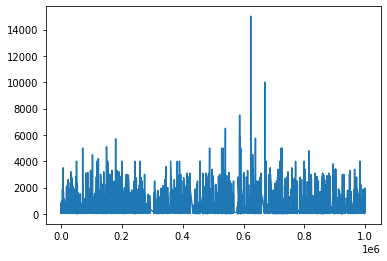

In [8]:
#import matplotlib.pyplot as plt
df['price'].plot()

<AxesSubplot:>

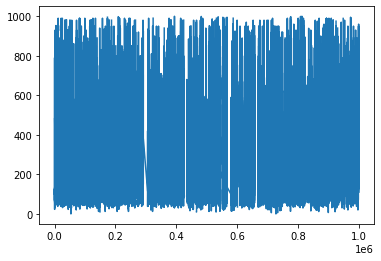

In [9]:
df['price'] = df['price'].loc[df['price'] < 1000]
df['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

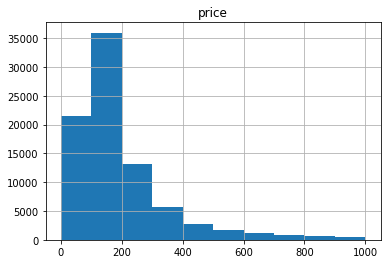

In [10]:
df.hist(column='price')

<AxesSubplot:>

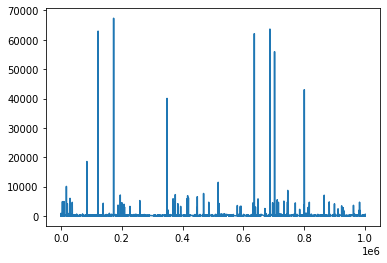

In [11]:
df['surface_covered'].plot()

<AxesSubplot:>

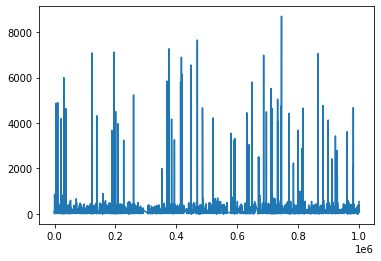

In [12]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 10000]
df['surface_covered'].plot()

<AxesSubplot:>

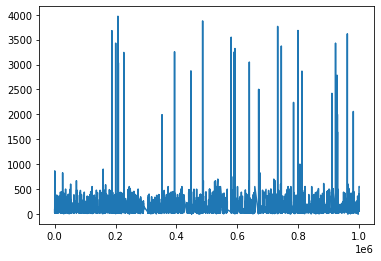

In [13]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 4000]
df['surface_covered'].plot()

<AxesSubplot:>

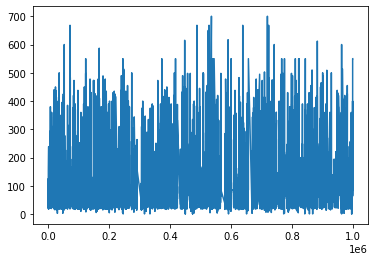

In [14]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 750]
df['surface_covered'].plot()

<AxesSubplot:>

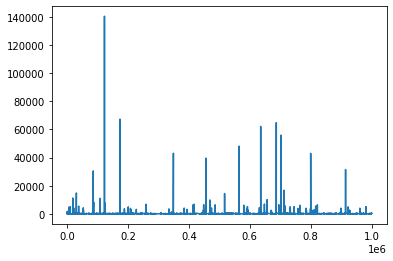

In [25]:
df['surface_total'].plot()

<AxesSubplot:>

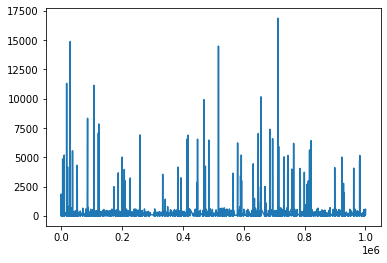

In [26]:
df['surface_total'] = df['surface_total'].loc[df['surface_total'] < 20000]
df['surface_total'].plot()

<AxesSubplot:xlabel='surface_covered'>

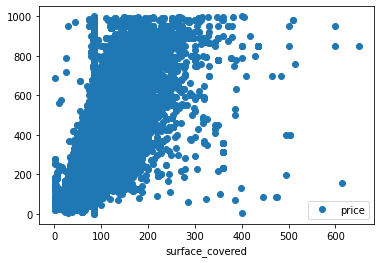

In [27]:
df.plot(x='surface_covered', y='price', style='o')

<AxesSubplot:xlabel='surface_total'>

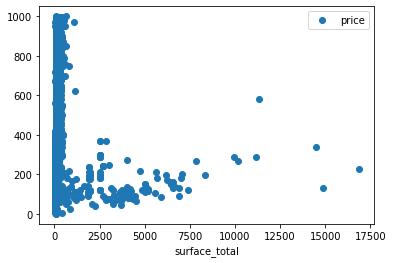

In [28]:
df.plot(x='surface_total', y='price', style='o')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86228 entries, 43 to 999980
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ad_type          86228 non-null  object        
 1   start_date       86228 non-null  object        
 2   end_date         86228 non-null  object        
 3   created_on       86228 non-null  datetime64[ns]
 4   lat              79585 non-null  float64       
 5   lon              79569 non-null  float64       
 6   l1               86228 non-null  object        
 7   l2               86228 non-null  object        
 8   l3               85809 non-null  object        
 9   l4               4267 non-null   object        
 10  rooms            86228 non-null  float64       
 11  bedrooms         86228 non-null  float64       
 12  bathrooms        82104 non-null  float64       
 13  surface_total    86228 non-null  float64       
 14  surface_covered  86140 non-null  flo

### ¿Cómo influye el barrio en el precio por m2?

In [16]:
# corren antes de "Transform & clean"
df['surface_total'].fillna((df['surface_total']), inplace=True)
df['price'].fillna((df['price']), inplace=True)

In [17]:
df["price_usd_per_m2"] = df["price"] / df["surface_total"]

In [18]:
import matplotlib.pyplot as plt
def get_top_places(df, num, cheapest):
    return df.groupby(['l3'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_top_places(df, num, cheapest,colour,title):
    graph = get_top_places(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=15)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Barrio", fontsize=18)
    graph.set_xlabel("USD/m2", fontsize=18)
    plt.show()

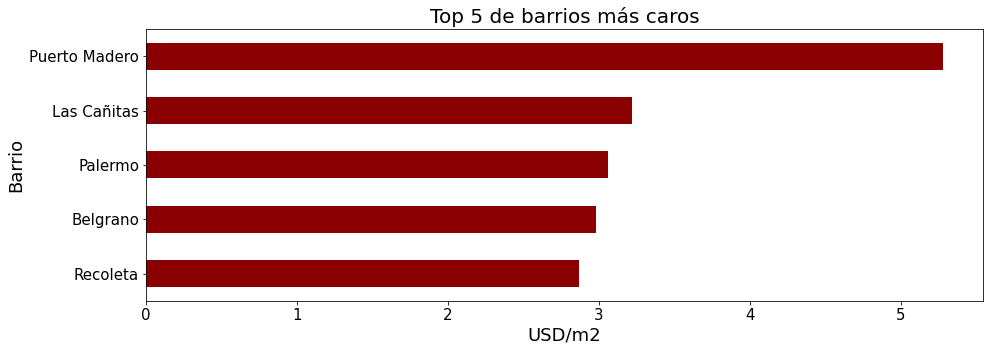

In [19]:
plot_top_places(df,5, False,'darkred',"Top 5 de barrios más caros")

/home/cgonzalez/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1557: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.barh(x, y, w, left=start, log=log, **kwds)


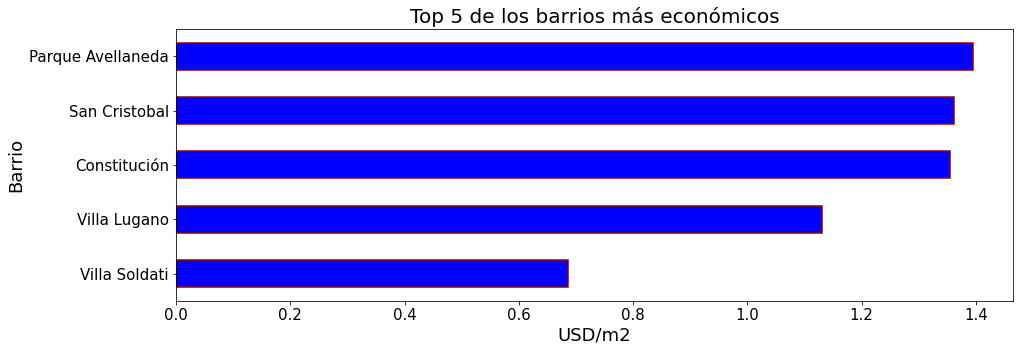

In [20]:
top5_cheap_CABA = get_top_places(df,5, True)
graph4 = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='darkred',lineWidth = 1.5,fontsize=15)
graph4.set_title("Top 5 de los barrios más económicos", fontsize=20)
graph4.set_ylabel("Barrio", fontsize=18)
graph4.set_xlabel("USD/m2", fontsize=18)
plt.show()

In [21]:
from pandas import Series
import matplotlib.pyplot as plt
df['l3'].fillna((df['l3']), inplace=True)
df_place = df.groupby(['l3'])['price_usd_per_m2'].sum().sort_values(ascending=True).head(5)

df_cant_place = df_place['l3'].apply(lambda x: Series(x).value_counts()).sum().sort_values(ascending= False )
df_cant_place.plot.barh(figsize=(12,5),color='black', fontsize=15);
plt.title('Cantidad de propiedades vendidas en Capital Federal', fontsize=20);
plt.xlabel('Cantidad', fontsize=17);
plt.ylabel('Barrio', fontsize=17);
plt.show();

KeyError: 'l3'